# Initialisasi

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from mpl_toolkits.mplot3d import Axes3D

import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Visualisasi Data

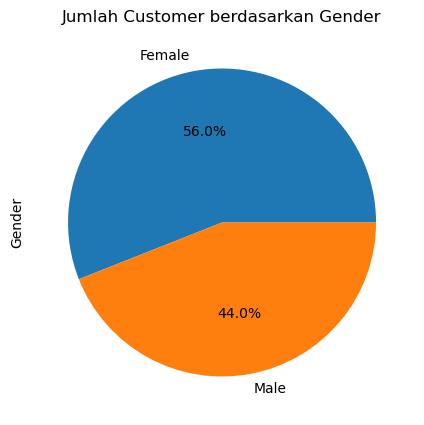

In [6]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 5))
gender_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Jumlah Customer berdasarkan Gender')
plt.show()

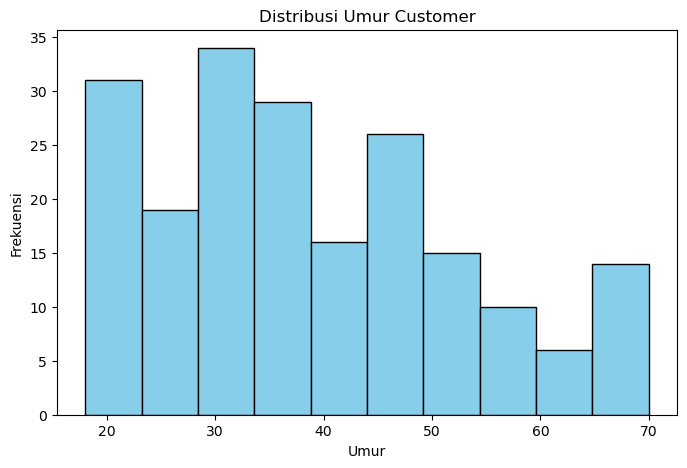

In [7]:
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], color='skyblue', edgecolor='black')
plt.title('Distribusi Umur Customer')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

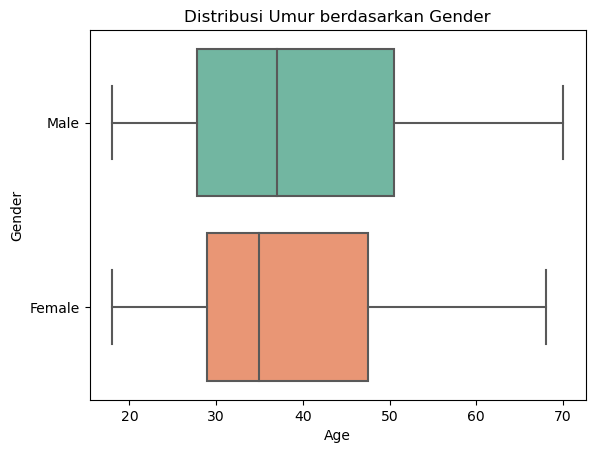

In [8]:
sns.boxplot(data=df, y='Gender', x='Age', palette='Set2')

plt.title('Distribusi Umur berdasarkan Gender')
plt.show()

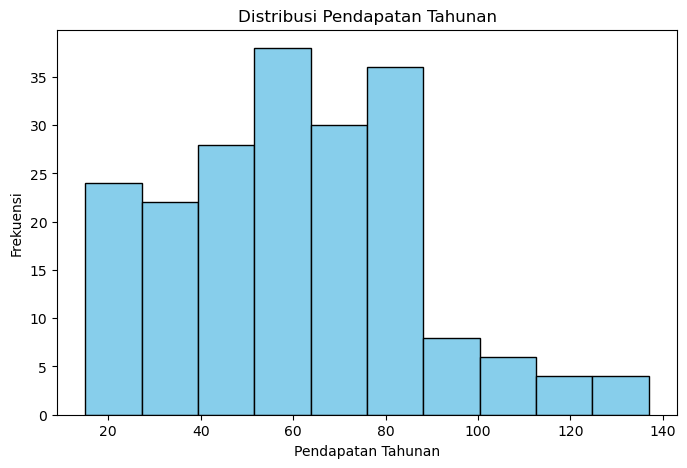

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(df['Annual Income (k$)'], color='skyblue', edgecolor='black')
plt.title('Distribusi Pendapatan Tahunan')
plt.xlabel('Pendapatan Tahunan')
plt.ylabel('Frekuensi')
plt.show()

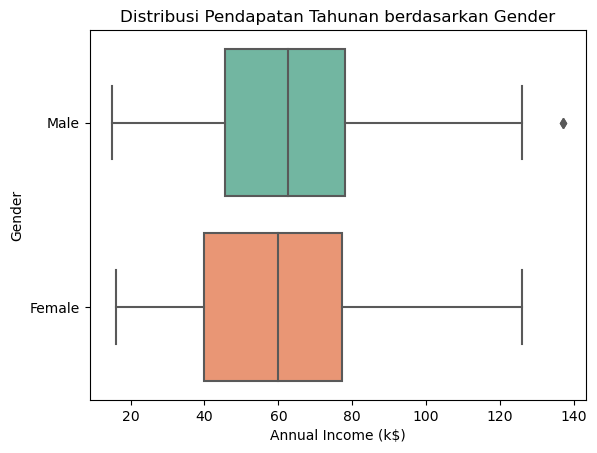

In [10]:
sns.boxplot(data=df, y='Gender', x='Annual Income (k$)', palette='Set2')

plt.title('Distribusi Pendapatan Tahunan berdasarkan Gender')
plt.show()

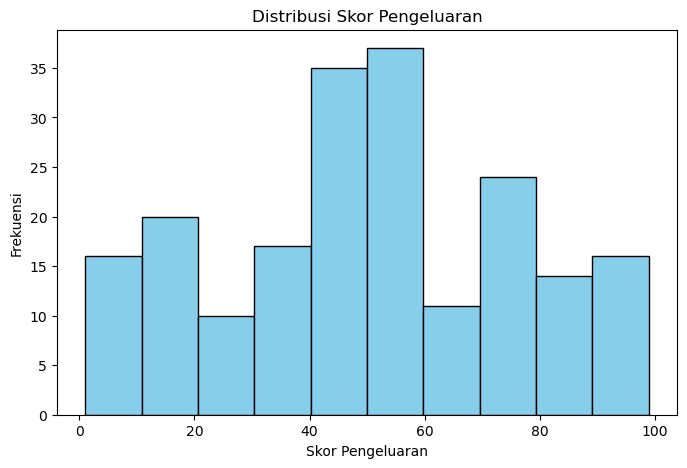

In [11]:
plt.figure(figsize=(8, 5))
plt.hist(df['Spending Score (1-100)'], color='skyblue', edgecolor='black')
plt.title('Distribusi Skor Pengeluaran')
plt.xlabel('Skor Pengeluaran')
plt.ylabel('Frekuensi')
plt.show()

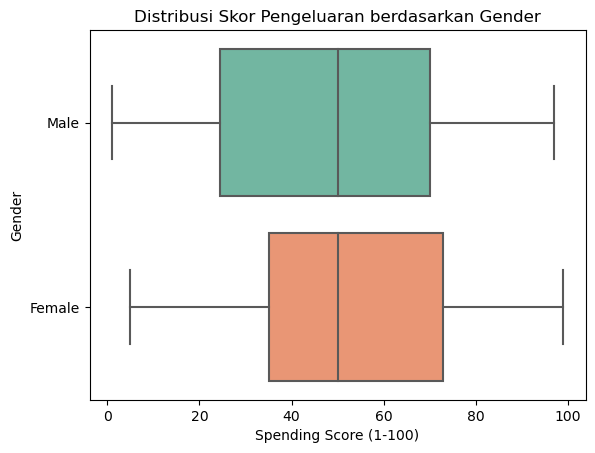

In [12]:
sns.boxplot(data=df, y='Gender', x='Spending Score (1-100)', palette='Set2')

plt.title('Distribusi Skor Pengeluaran berdasarkan Gender')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_25920\3065595379.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


<Axes: >

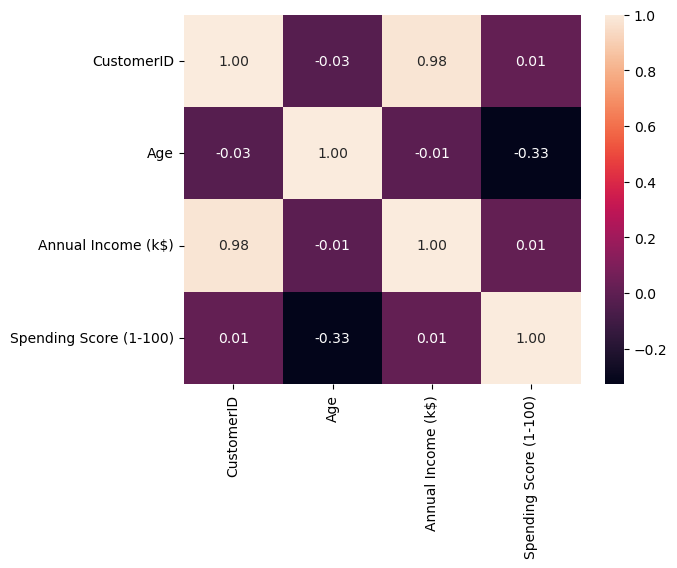

In [13]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")

# Preprocessing

In [14]:
data = df.copy()

In [15]:
data = data.drop('CustomerID', axis = 1)

### Encoding

In [16]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### Mengecek Missing Value

In [17]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Mengecek Outlier

In [18]:
z_scores = zscore(data)
threshold = 3
outliers = np.where(np.abs(z_scores) > threshold)[0]

num_outliers = len(outliers)
print("Jumlah outlier yang ditemukan:", num_outliers)

Jumlah outlier yang ditemukan: 0


### Normalisasi

In [19]:
ss = StandardScaler()

data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = ss.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [20]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980


# Elbow Method

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

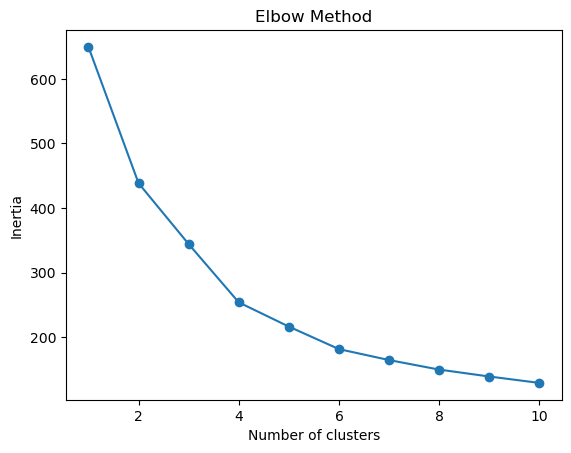

In [21]:
data_cluster = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.show()

### Evaluasi Jumlah Cluster Silhouette Score

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

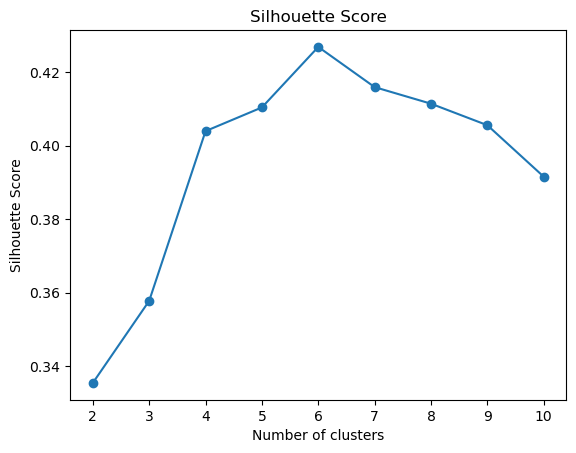

In [22]:
silhouette = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state=0)
    kmeans.fit(data)
    silhouette.append(silhouette_score(data_cluster, kmeans.labels_))

plt.plot(range(2, 11), silhouette, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.show()

### Clustering K-Means

In [23]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(data_cluster)
cluster_labels = kmeans.predict(data_cluster)

print(cluster_labels)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[5 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0
 5 0 5 4 5 0 2 0 5 4 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 4 4 4 2 4 4 2 2 4 4 4 4
 4 2 4 2 2 4 4 2 4 4 2 4 4 2 2 4 4 2 4 2 2 2 4 2 4 2 2 4 4 2 4 2 4 4 4 4 4
 2 2 2 2 2 4 4 4 4 2 2 2 1 2 1 3 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 4 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


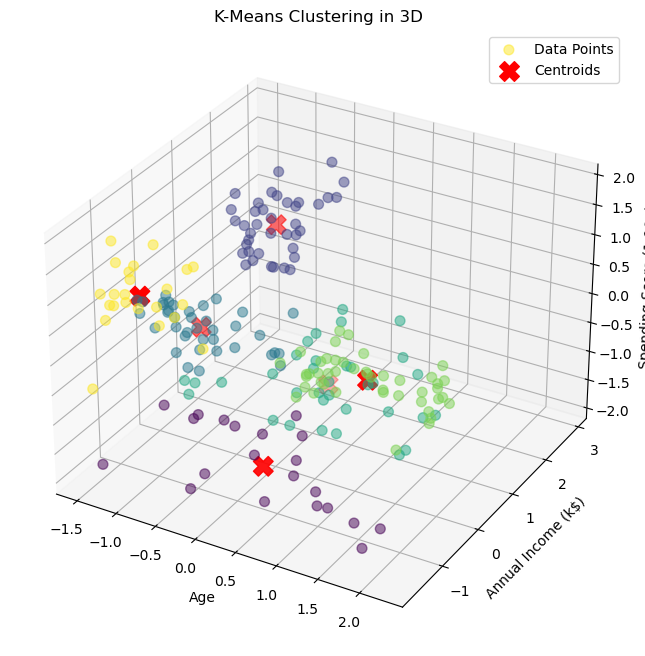

In [24]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'],
                     c=cluster_labels, cmap='viridis', s=50, alpha=0.5)

centroid_scatter = ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
                              s=200, c='red', marker='X', label='Centroids')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.legend([scatter, centroid_scatter], ['Data Points', 'Centroids'])

plt.title('K-Means Clustering in 3D')
plt.show()

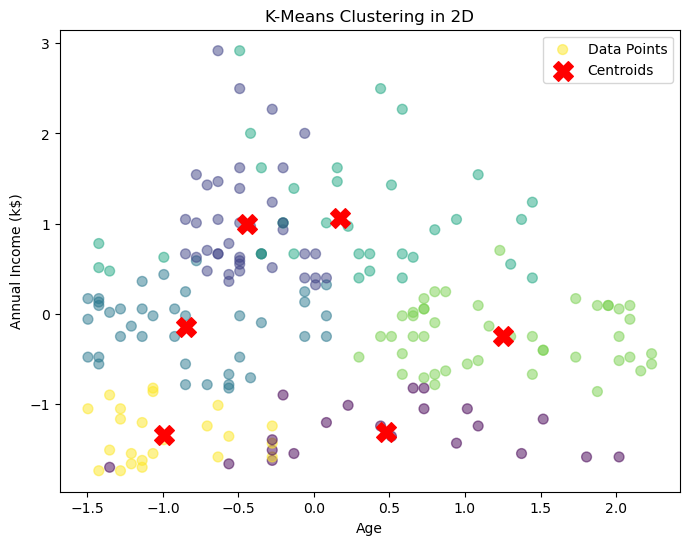

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Annual Income (k$)'], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(['Data Points', 'Centroids'])
plt.title('K-Means Clustering in 2D')

plt.show()

In [26]:
df['Cluster'] = cluster_labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,5
2,3,Female,20,16,6,0
3,4,Female,23,16,77,5
4,5,Female,31,17,40,0


In [27]:
df.groupby("Cluster").agg({
    "Age":"mean",
    "Annual Income (k$)":"mean",
    "Spending Score (1-100)":"mean",
    "Gender":lambda x: x.mode()[0],
})

,Age,Annual Income (k$),Spending Score (1-100),Gender
Cluster,,,,
0,45.523810,26.285714,19.380952,Female
1,32.692308,86.538462,82.128205,Female
2,27.000000,56.657895,49.131579,Female
3,41.264706,88.500000,16.764706,Male
4,56.333333,54.266667,49.066667,Female
5,25.000000,25.260870,77.608696,Female
